# Categorizing Variables

In [16]:
import pandas as pd
import os
import time
import random
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
#df_train.head()

confidence_interval = 95
random_seed=0

df_master = pd.read_csv('df_master_ready_critical.csv')

In [ ]:
# Define the feature set
variable = [
    "triage_acuity_iter", "arrival_transport_WALK_IN", "score_NEWS", 
    "triage_sbp_iter", "arrival_transport_UNKNOWN", "score_CCI",
    "arrival_transport_HELICOPTER", "med_event", "n_icu_365d", "triage_resprate_iter", 
    "score_CART", "score_NEWS2", "age", "triage_heartrate_iter", "triage_dbp_iter"
]

features = variable 
# Define target variable
target = "outcome_critical

In [4]:
#outcome variable is well balanced
# Calculate the count of each outcome
outcome_counts = df_master['outcome_critical'].value_counts()

# Print the distribution counts
print(outcome_counts)

outcome_critical
False    396917
True      28170
Name: count, dtype: int64


## Categorizing vars

### n_icu_365d

Summary Statistics for 'n_icu_365d':
count    425087.000000
mean          0.112377
std           0.494579
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: n_icu_365d, dtype: float64

Number of Missing Values in 'n_icu_365d': 0


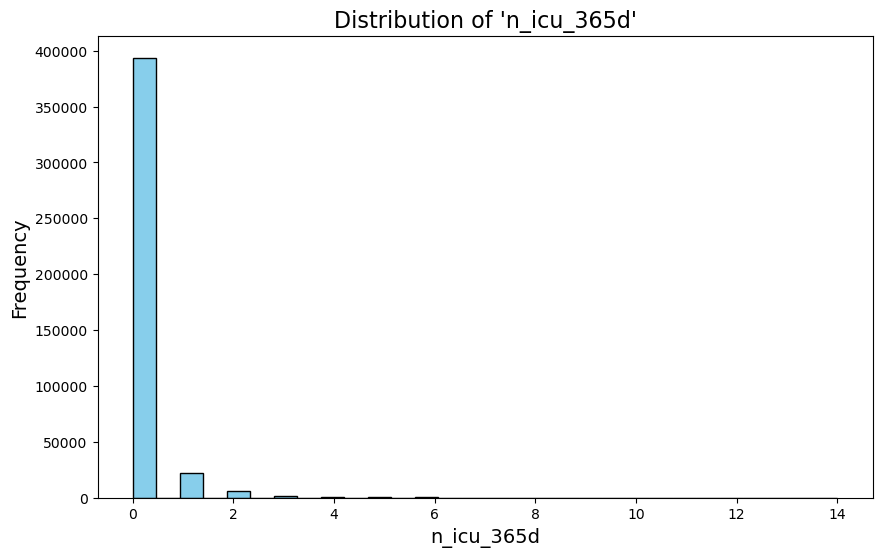

In [17]:
# Define the variable to explore
variable = 'n_icu_365d'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

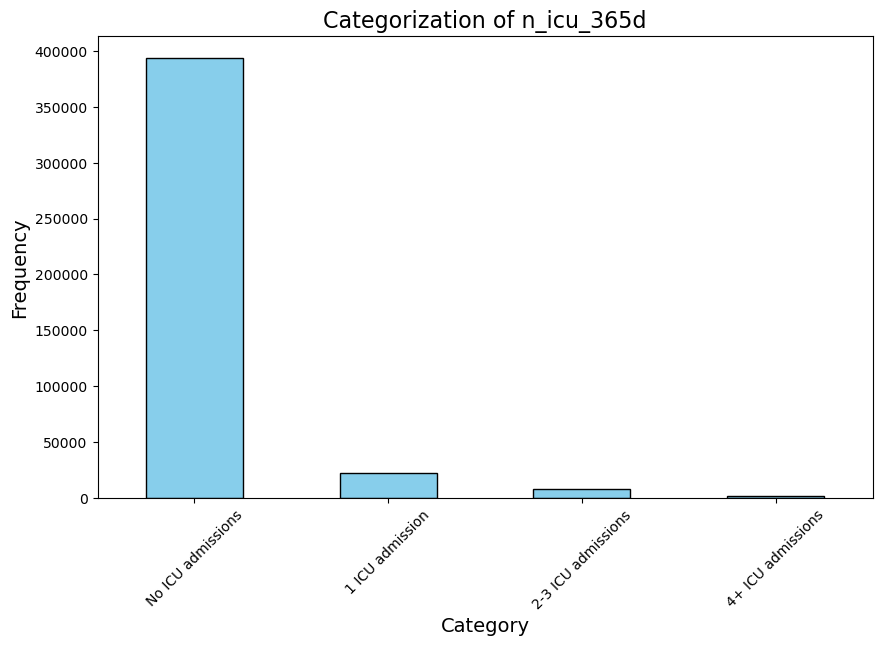

,n_icu_365d,n_icu_365d_category,n_icu_365d_numeric
0,0,No ICU admissions,0
1,0,No ICU admissions,0
2,0,No ICU admissions,0
3,0,No ICU admissions,0
4,1,1 ICU admission,1


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize n_icu_365d
def categorize_n_icu_365d(value):
    if value == 0:
        return 'No ICU admissions'
    elif value == 1:
        return '1 ICU admission'
    elif 2 <= value <= 3:
        return '2-3 ICU admissions'
    else:
        return '4+ ICU admissions'

# Apply the categorization
df_master['n_icu_365d_category'] = df_master['n_icu_365d'].apply(categorize_n_icu_365d)

# Define the correct category order with numerical mapping
category_mapping = {
    'No ICU admissions': 0,
    '1 ICU admission': 1,
    '2-3 ICU admissions': 2,
    '4+ ICU admissions': 3
}

# Map categories to numerical values
df_master['n_icu_365d_numeric'] = df_master['n_icu_365d_category'].map(category_mapping)

# Count values and ensure correct order
category_counts = df_master['n_icu_365d_category'].value_counts().reindex(category_mapping.keys())

# Visualize the categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of n_icu_365d', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display a sample to verify
df_master[['n_icu_365d', 'n_icu_365d_category', 'n_icu_365d_numeric']].head()



### triage_sbp

Summary Statistics for 'triage_sbp_iter':
count    425087.000000
mean        134.662201
std          22.206241
min           1.000000
25%         119.000000
50%         133.000000
75%         148.000000
max         312.000000
Name: triage_sbp_iter, dtype: float64

Number of Missing Values in 'triage_sbp_iter': 0


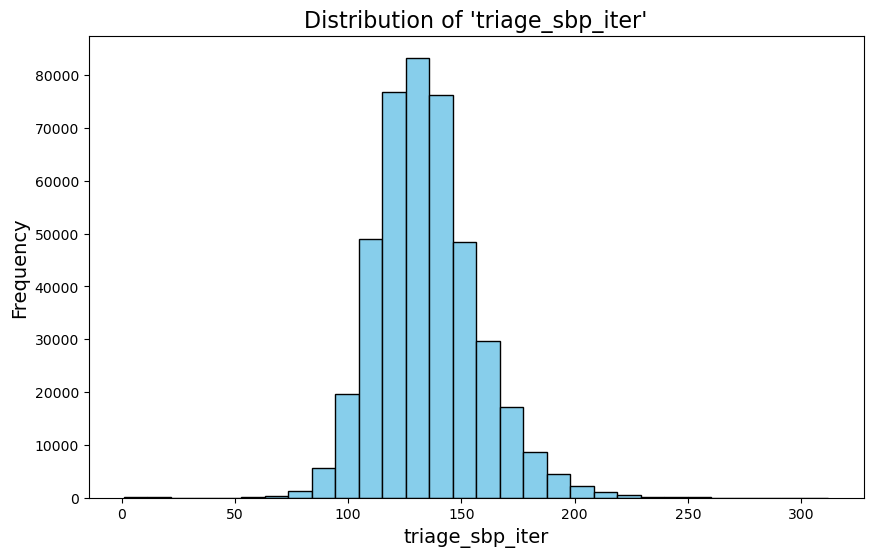

In [19]:
# Define the variable to explore
variable = 'triage_sbp_iter'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

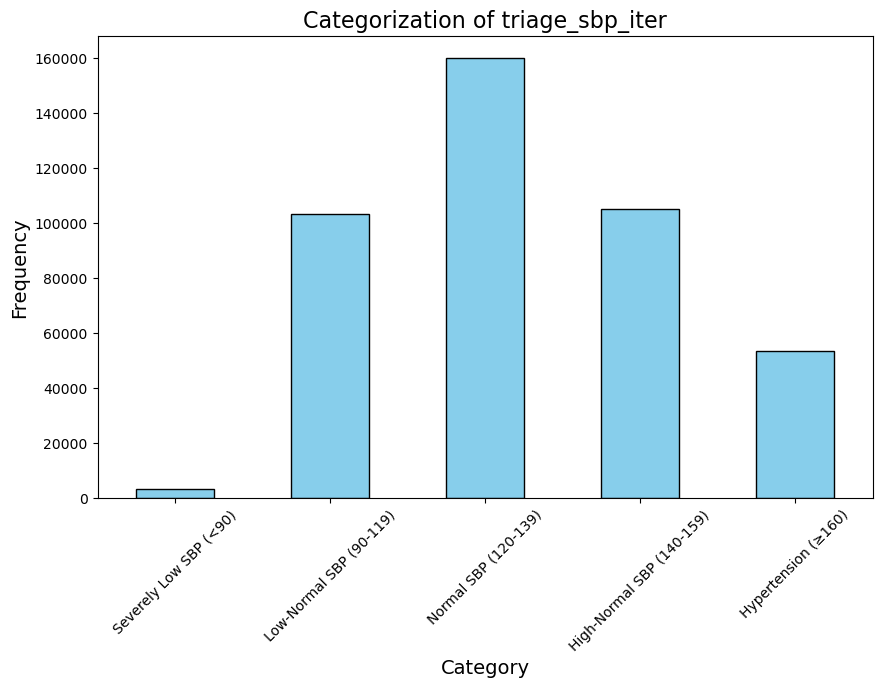

,triage_sbp_iter,triage_sbp_iter_category,triage_sbp_iter_numeric
0,106.0,Low-Normal SBP (90-119),1
1,116.0,Low-Normal SBP (90-119),1
2,71.0,Severely Low SBP (<90),0
3,96.0,Low-Normal SBP (90-119),1
4,106.0,Low-Normal SBP (90-119),1


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize triage_sbp_iter
def categorize_triage_sbp(value):
    if value < 90:
        return 'Severely Low SBP (<90)'
    elif 90 <= value < 120:
        return 'Low-Normal SBP (90-119)'
    elif 120 <= value < 140:
        return 'Normal SBP (120-139)'
    elif 140 <= value < 160:
        return 'High-Normal SBP (140-159)'
    else:
        return 'Hypertension (≥160)'

# Apply the categorization
df_master['triage_sbp_iter_category'] = df_master['triage_sbp_iter'].apply(categorize_triage_sbp)

# Define the correct category order
category_order = [
    'Severely Low SBP (<90)',
    'Low-Normal SBP (90-119)',
    'Normal SBP (120-139)',
    'High-Normal SBP (140-159)',
    'Hypertension (≥160)'
]

# Map categories to numerical values
category_mapping = {category: i for i, category in enumerate(category_order)}

# Create a numerical encoding for classifier use
df_master['triage_sbp_iter_numeric'] = df_master['triage_sbp_iter_category'].map(category_mapping)

# Count values and sort them in the predefined order
category_counts = df_master['triage_sbp_iter_category'].value_counts().reindex(category_order)

# Visualize the categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of triage_sbp_iter', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display a sample to verify
df_master[['triage_sbp_iter', 'triage_sbp_iter_category', 'triage_sbp_iter_numeric']].head()


### triage_dbp

Summary Statistics for 'triage_dbp_iter':
count    425087.000000
mean         77.412142
std          14.706164
min           0.000000
25%          68.000000
50%          77.000000
75%          87.000000
max         375.000000
Name: triage_dbp_iter, dtype: float64

Number of Missing Values in 'triage_dbp_iter': 0


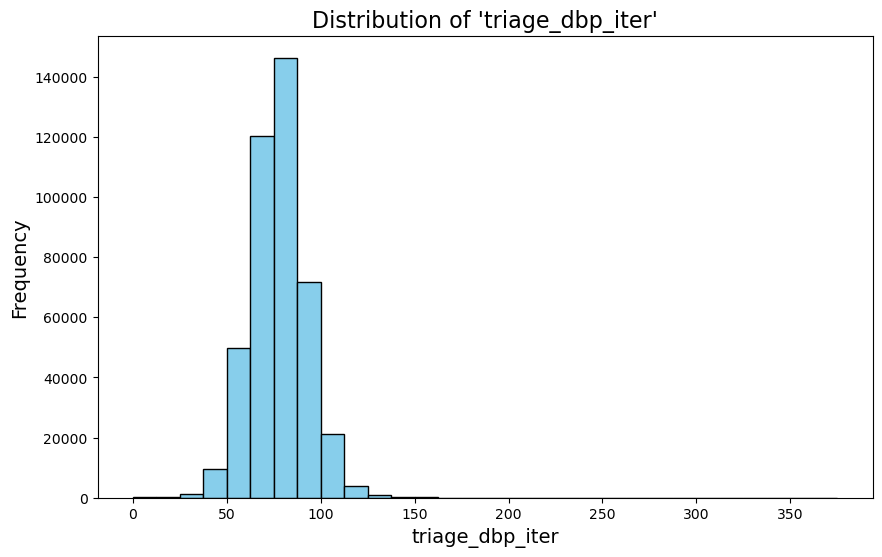

In [21]:
# Define the variable to explore
variable = 'triage_dbp_iter'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

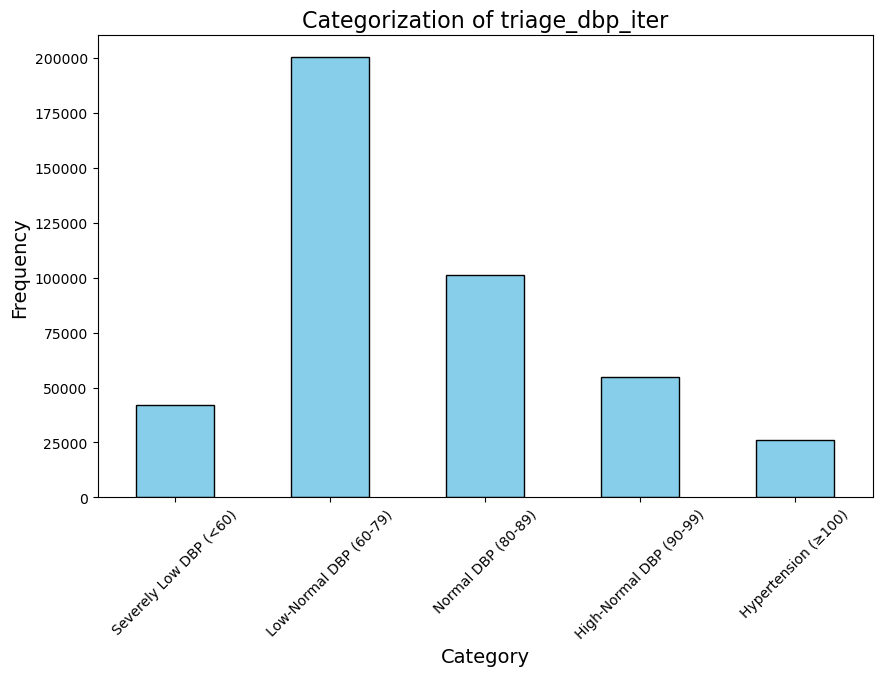

,triage_dbp_iter,triage_dbp_iter_category,triage_dbp_iter_numeric
0,63.0,Low-Normal DBP (60-79),1
1,88.0,Normal DBP (80-89),2
2,43.0,Severely Low DBP (<60),0
3,50.0,Severely Low DBP (<60),0
4,57.0,Severely Low DBP (<60),0


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize triage_dbp_iter
def categorize_triage_dbp(value):
    if value < 60:
        return 'Severely Low DBP (<60)'
    elif 60 <= value < 80:
        return 'Low-Normal DBP (60-79)'
    elif 80 <= value < 90:
        return 'Normal DBP (80-89)'
    elif 90 <= value < 100:
        return 'High-Normal DBP (90-99)'
    else:
        return 'Hypertension (≥100)'

# Apply the categorization
df_master['triage_dbp_iter_category'] = df_master['triage_dbp_iter'].apply(categorize_triage_dbp)

# Define the correct category order
category_order = [
    'Severely Low DBP (<60)',
    'Low-Normal DBP (60-79)',
    'Normal DBP (80-89)',
    'High-Normal DBP (90-99)',
    'Hypertension (≥100)'
]

# Map categories to numerical values
category_mapping = {category: i for i, category in enumerate(category_order)}

# Create a numerical encoding for classifier use
df_master['triage_dbp_iter_numeric'] = df_master['triage_dbp_iter_category'].map(category_mapping)

# Count values and sort them in the predefined order
category_counts = df_master['triage_dbp_iter_category'].value_counts().reindex(category_order)

# Visualize the categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of triage_dbp_iter', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display a sample to verify
df_master[['triage_dbp_iter', 'triage_dbp_iter_category', 'triage_dbp_iter_numeric']].head()


### triage_resprate

Summary Statistics for 'triage_resprate_iter':
count    425087.000000
mean         17.595633
std           2.562656
min           0.000000
25%          16.000000
50%          18.000000
75%          18.000000
max         209.000000
Name: triage_resprate_iter, dtype: float64

Number of Missing Values in 'triage_resprate_iter': 0


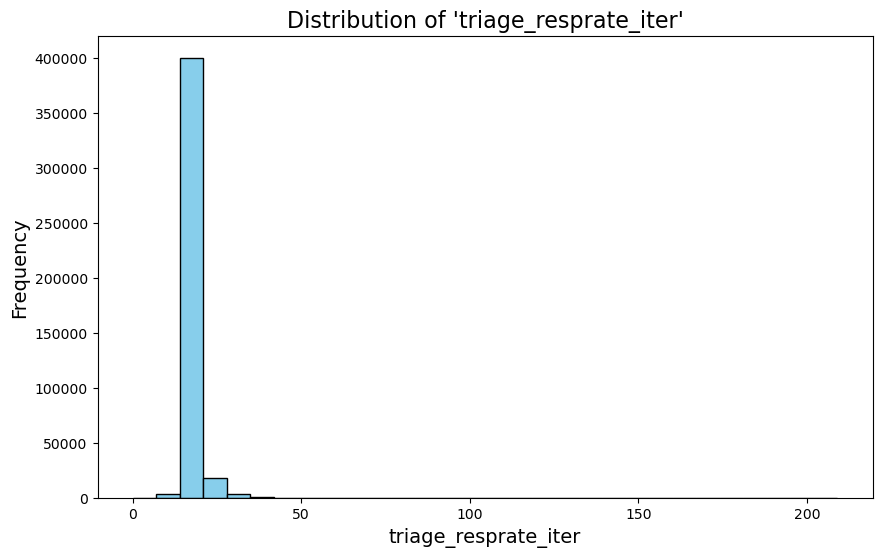

In [23]:
# Define the variable to explore
variable = 'triage_resprate_iter'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

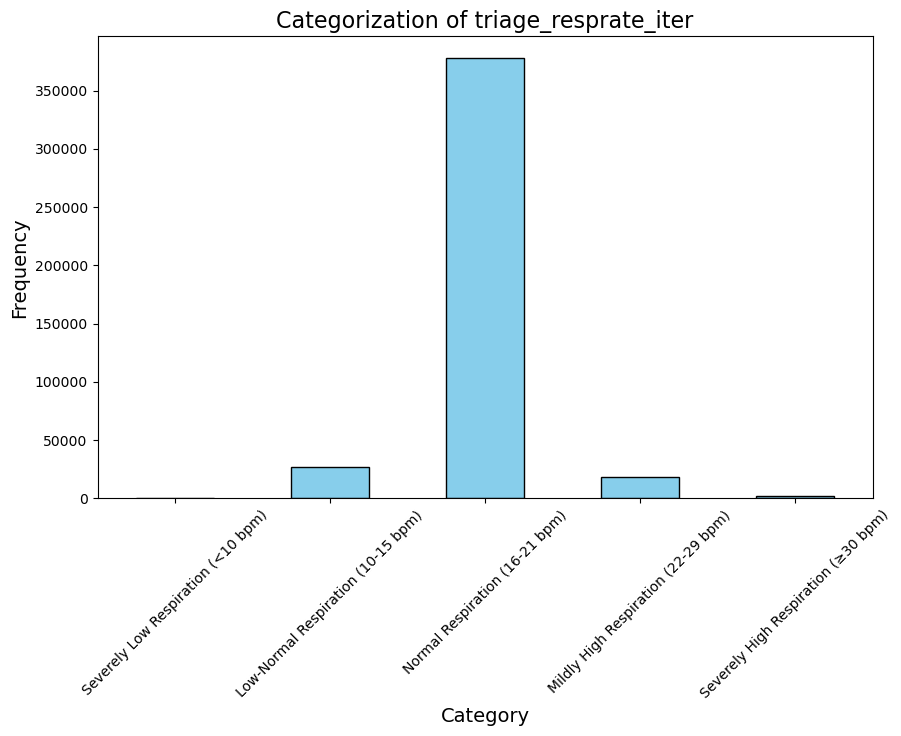

,triage_resprate_iter,triage_resprate_iter_category,triage_resprate_iter_numeric
0,16.0,Normal Respiration (16-21 bpm),2
1,18.0,Normal Respiration (16-21 bpm),2
2,14.0,Low-Normal Respiration (10-15 bpm),1
3,16.0,Normal Respiration (16-21 bpm),2
4,18.0,Normal Respiration (16-21 bpm),2


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize triage_resprate_iter
def categorize_triage_resprate(value):
    if value < 10:
        return 'Severely Low Respiration (<10 bpm)'
    elif 10 <= value < 16:
        return 'Low-Normal Respiration (10-15 bpm)'
    elif 16 <= value < 22:
        return 'Normal Respiration (16-21 bpm)'
    elif 22 <= value < 30:
        return 'Mildly High Respiration (22-29 bpm)'
    else:
        return 'Severely High Respiration (≥30 bpm)'

# Apply the categorization
df_master['triage_resprate_iter_category'] = df_master['triage_resprate_iter'].apply(categorize_triage_resprate)

# Define the correct category order
category_order = [
    'Severely Low Respiration (<10 bpm)',
    'Low-Normal Respiration (10-15 bpm)',
    'Normal Respiration (16-21 bpm)',
    'Mildly High Respiration (22-29 bpm)',
    'Severely High Respiration (≥30 bpm)'
]

# Map categories to numerical values
category_mapping = {category: i for i, category in enumerate(category_order)}

# Create a numerical encoding for classifier use
df_master['triage_resprate_iter_numeric'] = df_master['triage_resprate_iter_category'].map(category_mapping)

# Count values and sort them in the predefined order
category_counts = df_master['triage_resprate_iter_category'].value_counts().reindex(category_order)

# Visualize the categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of triage_resprate_iter', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display a sample to verify
df_master[['triage_resprate_iter', 'triage_resprate_iter_category', 'triage_resprate_iter_numeric']].head()


### triage_heartrate

Summary Statistics for 'triage_heartrate_iter':
count    425087.000000
mean         85.371714
std          17.886677
min           1.000000
25%          73.000000
50%          84.000000
75%          96.000000
max         256.000000
Name: triage_heartrate_iter, dtype: float64

Number of Missing Values in 'triage_heartrate_iter': 0


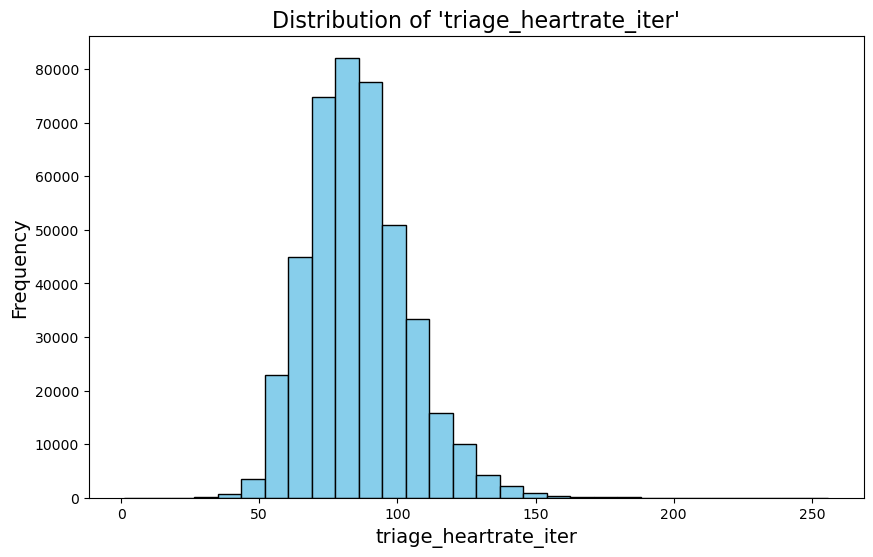

In [25]:
# Define the variable to explore
variable = 'triage_heartrate_iter'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

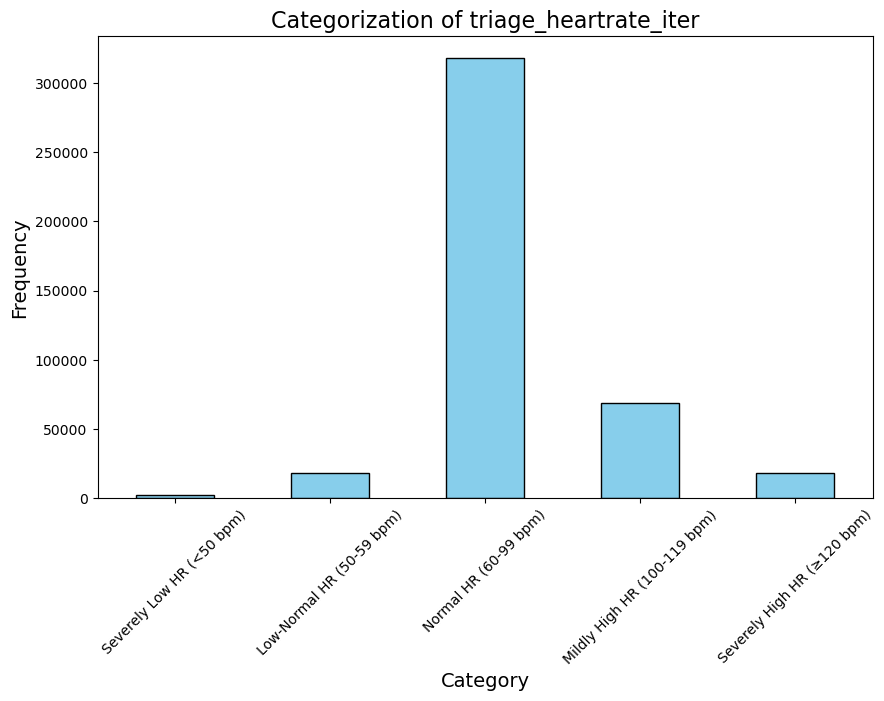

,triage_heartrate_iter,triage_heartrate_iter_category,triage_heartrate_iter_numeric
0,70.0,Normal HR (60-99 bpm),2
1,88.0,Normal HR (60-99 bpm),2
2,87.0,Normal HR (60-99 bpm),2
3,77.0,Normal HR (60-99 bpm),2
4,105.0,Mildly High HR (100-119 bpm),3


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize triage_heartrate_iter
def categorize_triage_heartrate(value):
    if value < 50:
        return 'Severely Low HR (<50 bpm)'
    elif 50 <= value < 60:
        return 'Low-Normal HR (50-59 bpm)'
    elif 60 <= value < 100:
        return 'Normal HR (60-99 bpm)'
    elif 100 <= value < 120:
        return 'Mildly High HR (100-119 bpm)'
    else:
        return 'Severely High HR (≥120 bpm)'

# Apply the categorization
df_master['triage_heartrate_iter_category'] = df_master['triage_heartrate_iter'].apply(categorize_triage_heartrate)

# Define the correct category order
category_order = [
    'Severely Low HR (<50 bpm)',
    'Low-Normal HR (50-59 bpm)',
    'Normal HR (60-99 bpm)',
    'Mildly High HR (100-119 bpm)',
    'Severely High HR (≥120 bpm)'
]

# Map categories to numerical values
category_mapping = {category: i for i, category in enumerate(category_order)}

# Create a numerical encoding for classifier use
df_master['triage_heartrate_iter_numeric'] = df_master['triage_heartrate_iter_category'].map(category_mapping)

# Count values and sort them in the predefined order
category_counts = df_master['triage_heartrate_iter_category'].value_counts().reindex(category_order)

# Visualize the categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of triage_heartrate_iter', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display a sample to verify
df_master[['triage_heartrate_iter', 'triage_heartrate_iter_category', 'triage_heartrate_iter_numeric']].head()


### age

Summary Statistics for 'age':
count    425087.000000
mean         52.862845
std          20.619338
min          18.000000
25%          35.000000
50%          53.000000
75%          69.000000
max         103.000000
Name: age, dtype: float64

Number of Missing Values in 'age': 0


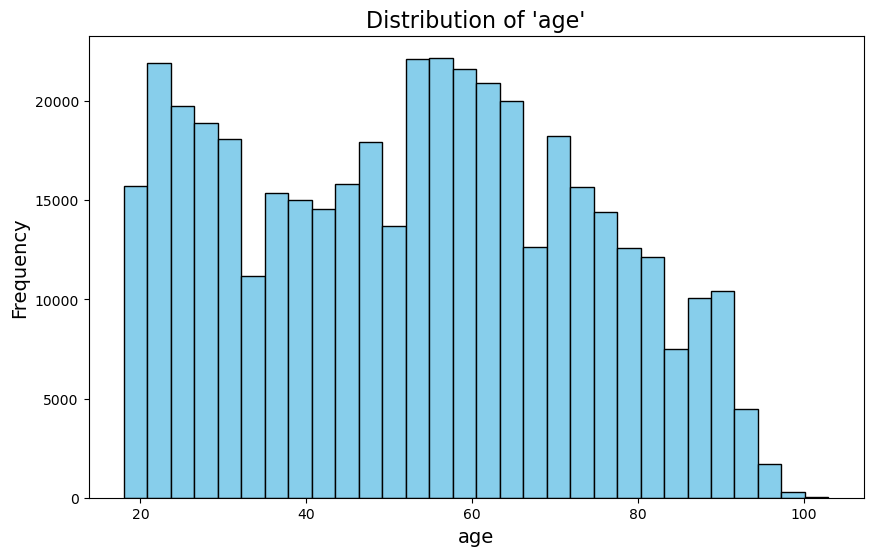

In [27]:
# Define the variable to explore
variable = 'age'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

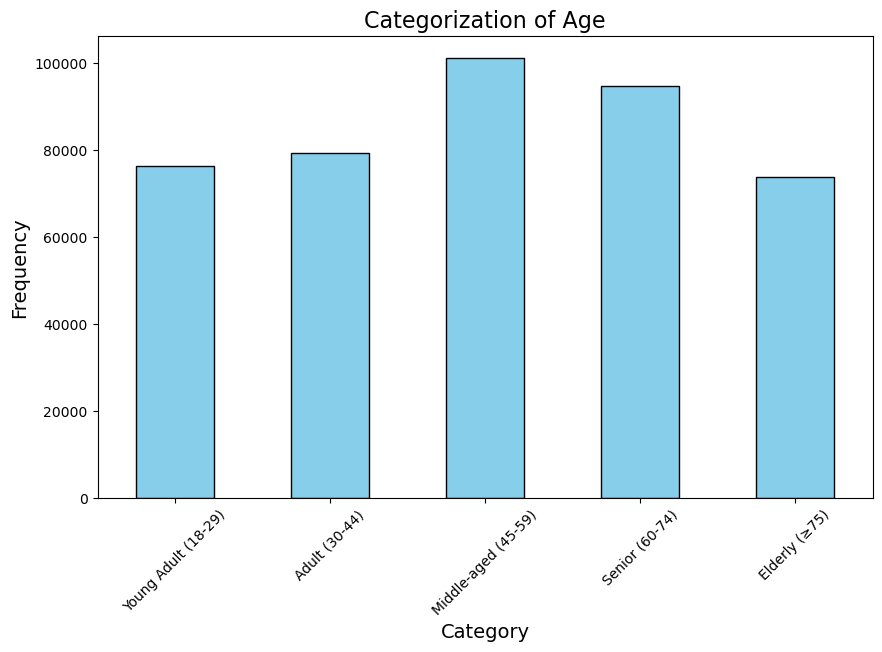

,age,age_category,age_numeric
0,52,Middle-aged (45-59),2
1,52,Middle-aged (45-59),2
2,52,Middle-aged (45-59),2
3,52,Middle-aged (45-59),2
4,52,Middle-aged (45-59),2


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize age
def categorize_age(value):
    if 18 <= value < 30:
        return 'Young Adult (18-29)'
    elif 30 <= value < 45:
        return 'Adult (30-44)'
    elif 45 <= value < 60:
        return 'Middle-aged (45-59)'
    elif 60 <= value < 75:
        return 'Senior (60-74)'
    else:
        return 'Elderly (≥75)'

# Apply the categorization
df_master['age_category'] = df_master['age'].apply(categorize_age)

# Define the correct category order
category_order = [
    'Young Adult (18-29)',
    'Adult (30-44)',
    'Middle-aged (45-59)',
    'Senior (60-74)',
    'Elderly (≥75)'
]

# Map categories to numerical values
category_mapping = {category: i for i, category in enumerate(category_order)}

# Create a numerical encoding for classifier use
df_master['age_numeric'] = df_master['age_category'].map(category_mapping)

# Count values and sort them in the predefined order
category_counts = df_master['age_category'].value_counts().reindex(category_order)

# Visualize the categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of Age', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display a sample to verify
df_master[['age', 'age_category', 'age_numeric']].head()


### triage_acuity

Summary Statistics for 'triage_acuity_iter':
count    425087.000000
mean          2.622564
std           0.708146
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: triage_acuity_iter, dtype: float64

Number of Missing Values in 'triage_acuity_iter': 0


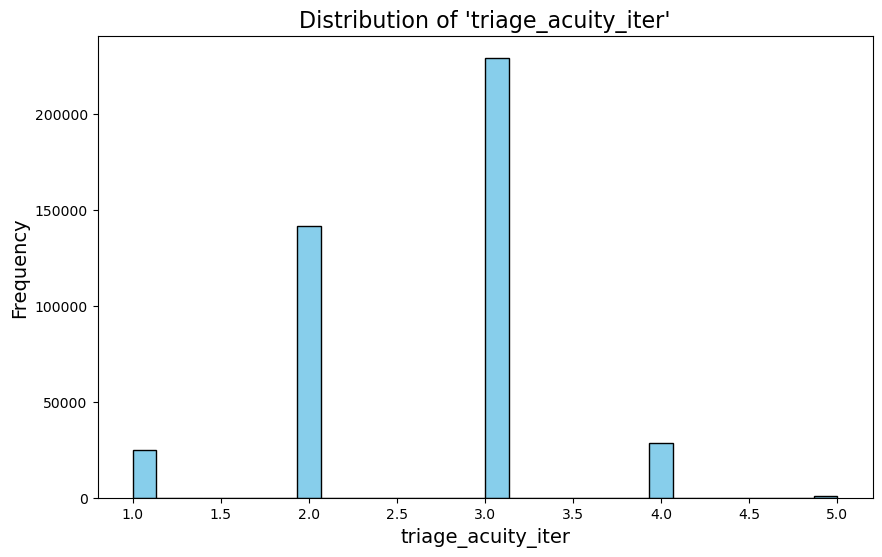

In [29]:
# Define the variable to explore
variable = 'triage_acuity_iter'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

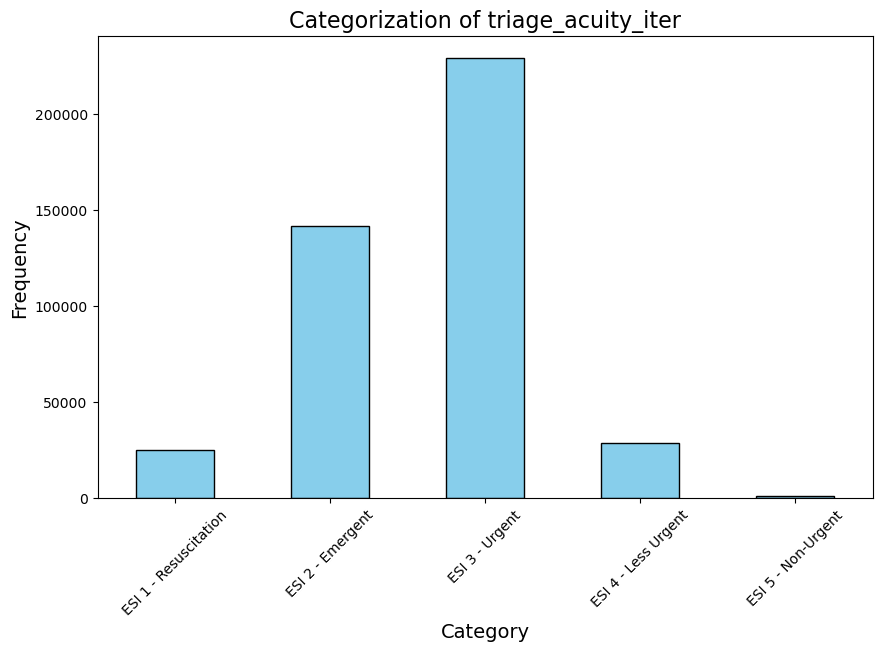

,triage_acuity_iter,triage_acuity_iter_category,triage_acuity_iter_numeric
0,3.0,ESI 3 - Urgent,3.0
1,3.0,ESI 3 - Urgent,3.0
2,2.0,ESI 2 - Emergent,2.0
3,2.0,ESI 2 - Emergent,2.0
4,3.0,ESI 3 - Urgent,3.0


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize triage_acuity_iter
def categorize_triage_acuity(value):
    if value == 1:
        return 'ESI 1 - Resuscitation'
    elif value == 2:
        return 'ESI 2 - Emergent'
    elif value == 3:
        return 'ESI 3 - Urgent'
    elif value == 4:
        return 'ESI 4 - Less Urgent'
    else:
        return 'ESI 5 - Non-Urgent'

# Apply the categorization
df_master['triage_acuity_iter_category'] = df_master['triage_acuity_iter'].apply(categorize_triage_acuity)

# Define the correct category order
category_order = [
    'ESI 1 - Resuscitation',
    'ESI 2 - Emergent',
    'ESI 3 - Urgent',
    'ESI 4 - Less Urgent',
    'ESI 5 - Non-Urgent'
]

# Map categories to numerical values (keeping them the same)
category_mapping = {category: i+1 for i, category in enumerate(category_order)}

# Create a numerical encoding (same as original values)
df_master['triage_acuity_iter_numeric'] = df_master['triage_acuity_iter']

# Count values and sort them in the predefined order
category_counts = df_master['triage_acuity_iter_category'].value_counts().reindex(category_order)

# Visualize the categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of triage_acuity_iter', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display a sample to verify
df_master[['triage_acuity_iter', 'triage_acuity_iter_category', 'triage_acuity_iter_numeric']].head()


### score_NEWS

Summary Statistics for 'score_NEWS':
count    425087.000000
mean          0.950652
std           1.293660
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          12.000000
Name: score_NEWS, dtype: float64

Number of Missing Values in 'score_NEWS': 0


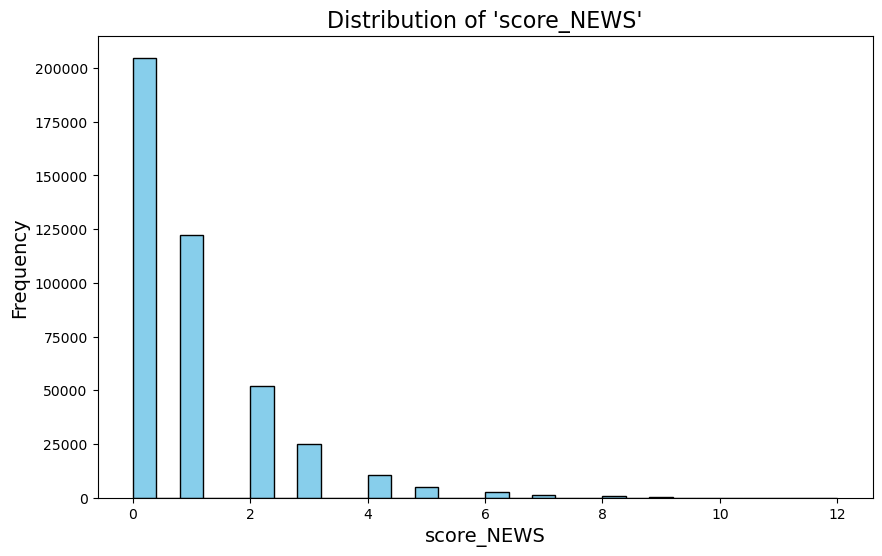

In [31]:
# Define the variable to explore
variable = 'score_NEWS'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

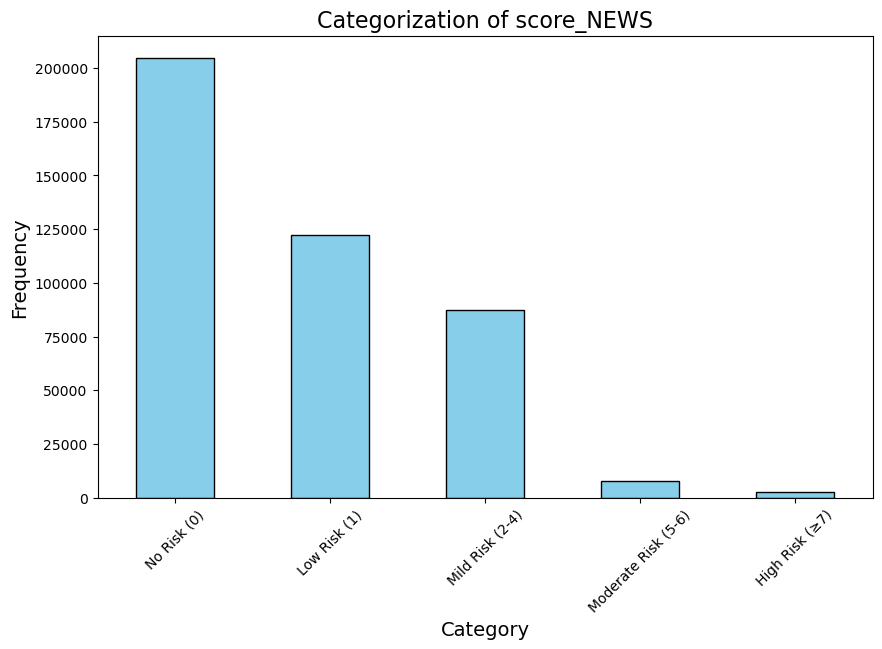

,score_NEWS,score_NEWS_category,score_NEWS_numeric
0,1,Low Risk (1),1
1,0,No Risk (0),0
2,3,Mild Risk (2-4),2
3,2,Mild Risk (2-4),2
4,2,Mild Risk (2-4),2


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize score_NEWS
def categorize_score_news(value):
    if value == 0:
        return 'No Risk (0)'
    elif value == 1:
        return 'Low Risk (1)'
    elif 2 <= value <= 4:
        return 'Mild Risk (2-4)'
    elif 5 <= value <= 6:
        return 'Moderate Risk (5-6)'
    else:
        return 'High Risk (≥7)'

# Apply the categorization
df_master['score_NEWS_category'] = df_master['score_NEWS'].apply(categorize_score_news)

# Define the correct category order
category_order = [
    'No Risk (0)',
    'Low Risk (1)',
    'Mild Risk (2-4)',
    'Moderate Risk (5-6)',
    'High Risk (≥7)'
]

# Map categories to numerical values
category_mapping = {category: i for i, category in enumerate(category_order)}

# Create a numerical encoding for classifier use
df_master['score_NEWS_numeric'] = df_master['score_NEWS_category'].map(category_mapping)

# Count values and sort them in the predefined order
category_counts = df_master['score_NEWS_category'].value_counts().reindex(category_order)

# Visualize the categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of score_NEWS', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display a sample to verify
df_master[['score_NEWS', 'score_NEWS_category', 'score_NEWS_numeric']].head()



### score_NEWS2

Summary Statistics for 'score_NEWS2':
count    425087.000000
mean          0.831738
std           1.146214
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: score_NEWS2, dtype: float64

Number of Missing Values in 'score_NEWS2': 0


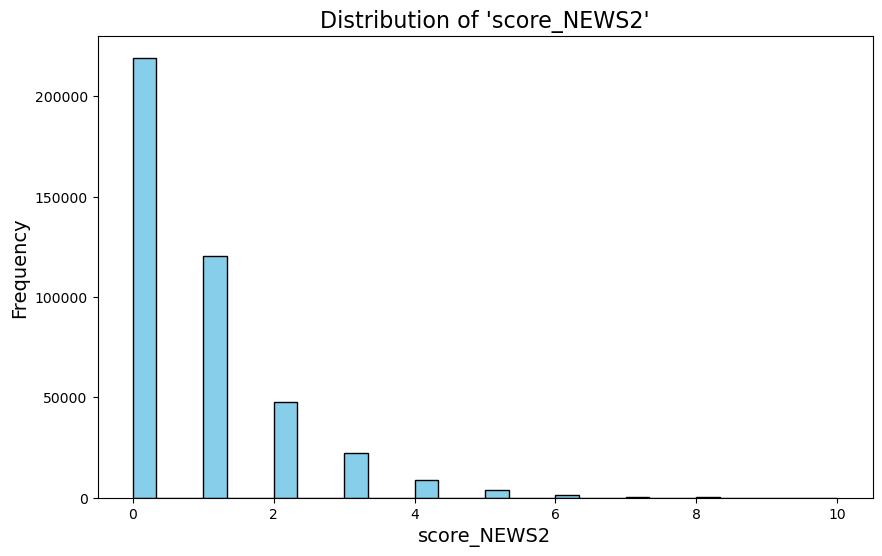

In [33]:
# Define the variable to explore
variable = 'score_NEWS2'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

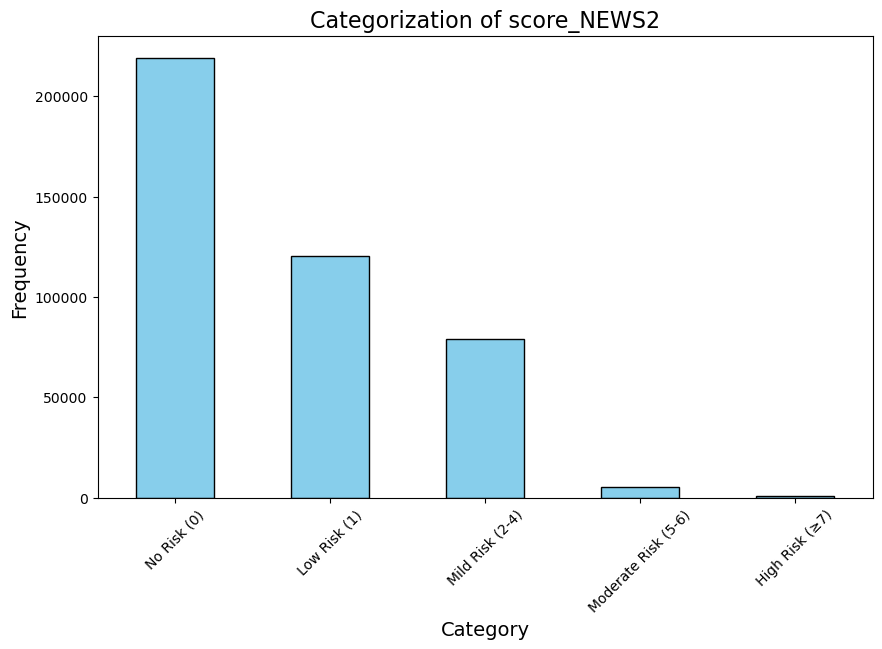

,score_NEWS2,score_NEWS2_category,score_NEWS2_numeric
0,1,Low Risk (1),1
1,0,No Risk (0),0
2,3,Mild Risk (2-4),2
3,2,Mild Risk (2-4),2
4,2,Mild Risk (2-4),2


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize score_NEWS2
def categorize_score_news2(value):
    if value == 0:
        return 'No Risk (0)'
    elif value == 1:
        return 'Low Risk (1)'
    elif 2 <= value <= 4:
        return 'Mild Risk (2-4)'
    elif 5 <= value <= 6:
        return 'Moderate Risk (5-6)'
    else:
        return 'High Risk (≥7)'

# Apply the categorization
df_master['score_NEWS2_category'] = df_master['score_NEWS2'].apply(categorize_score_news2)

# Define the correct category order
category_order = [
    'No Risk (0)',
    'Low Risk (1)',
    'Mild Risk (2-4)',
    'Moderate Risk (5-6)',
    'High Risk (≥7)'
]

# Map categories to numerical values
category_mapping = {category: i for i, category in enumerate(category_order)}

# Create a numerical encoding for classifier use
df_master['score_NEWS2_numeric'] = df_master['score_NEWS2_category'].map(category_mapping)

# Count values and sort them in the predefined order
category_counts = df_master['score_NEWS2_category'].value_counts().reindex(category_order)

# Visualize the categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of score_NEWS2', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display a sample to verify
df_master[['score_NEWS2', 'score_NEWS2_category', 'score_NEWS2_numeric']].head()



### score_CART

Summary Statistics for 'score_CART':
count    425087.000000
mean          4.255322
std           5.173777
min           0.000000
25%           0.000000
50%           4.000000
75%           9.000000
max          48.000000
Name: score_CART, dtype: float64

Number of Missing Values in 'score_CART': 0


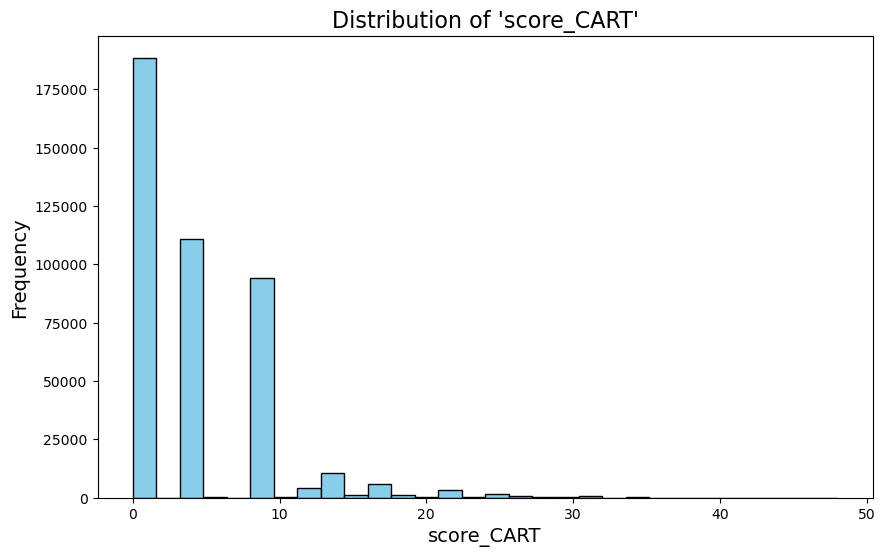

In [49]:
# Define the variable to explore
variable = 'score_CART'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

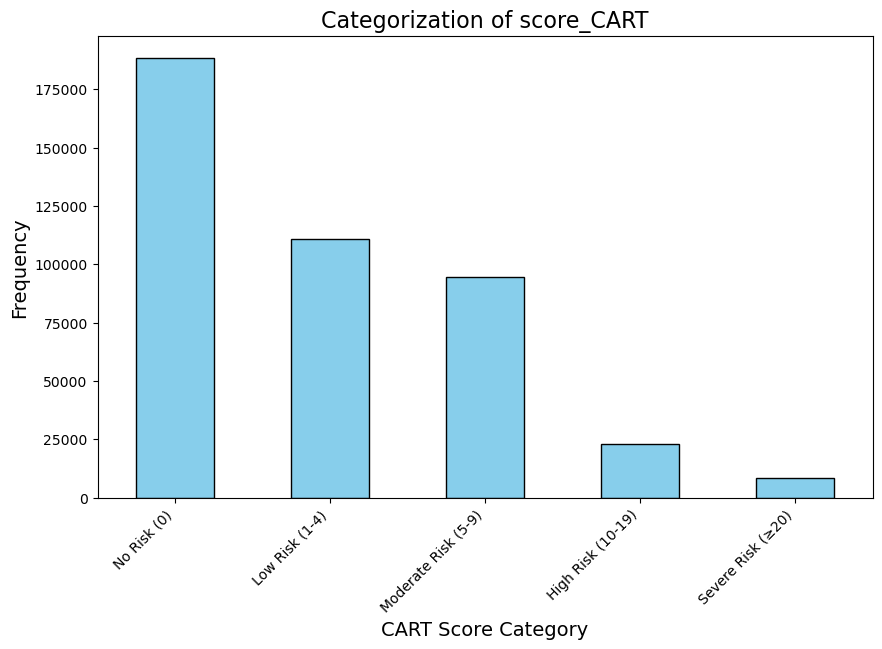

    score_CART  score_CART_category  score_CART_numeric
0            0          No Risk (0)                   0
1            0          No Risk (0)                   0
2            4       Low Risk (1-4)                   1
3            0          No Risk (0)                   0
4            0          No Risk (0)                   0
5            9  Moderate Risk (5-9)                   2
6            9  Moderate Risk (5-9)                   2
7            0          No Risk (0)                   0
8            0          No Risk (0)                   0
9            0          No Risk (0)                   0
10           0          No Risk (0)                   0
11           0          No Risk (0)                   0
12           4       Low Risk (1-4)                   1
13           8  Moderate Risk (5-9)                   2
14           4       Low Risk (1-4)                   1


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Example function to categorize 'score_CART'
def categorize_score_cart(value):
    """
    Categorize the CART score into bins based on clinical 
    or distribution-based reasoning.
    """
    if value == 0:
        return 'No Risk (0)'
    elif 1 <= value <= 4:
        return 'Low Risk (1-4)'
    elif 5 <= value <= 9:
        return 'Moderate Risk (5-9)'
    elif 10 <= value <= 19:
        return 'High Risk (10-19)'
    else:  # value >= 20
        return 'Severe Risk (≥20)'

# Apply the categorization
df_master['score_CART_category'] = df_master['score_CART'].apply(categorize_score_cart)

# Define a consistent category order (from lowest to highest risk)
category_order = [
    'No Risk (0)',
    'Low Risk (1-4)',
    'Moderate Risk (5-9)',
    'High Risk (10-19)',
    'Severe Risk (≥20)'
]

# Create a mapping to numeric codes (optional, for ML usage)
category_mapping = {cat: i for i, cat in enumerate(category_order)}
df_master['score_CART_numeric'] = df_master['score_CART_category'].map(category_mapping)

# Count the categories in the predefined order
category_counts = df_master['score_CART_category'].value_counts().reindex(category_order)

# Plot the categorized distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of score_CART', fontsize=16)
plt.xlabel('CART Score Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

# Inspect a few rows to verify the transformation
print(df_master[['score_CART', 'score_CART_category', 'score_CART_numeric']].head(15))


### score_CCI

Summary Statistics for 'score_CCI':
count    425087.000000
mean          2.699153
std           3.350223
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          25.000000
Name: score_CCI, dtype: float64

Number of Missing Values in 'score_CCI': 0


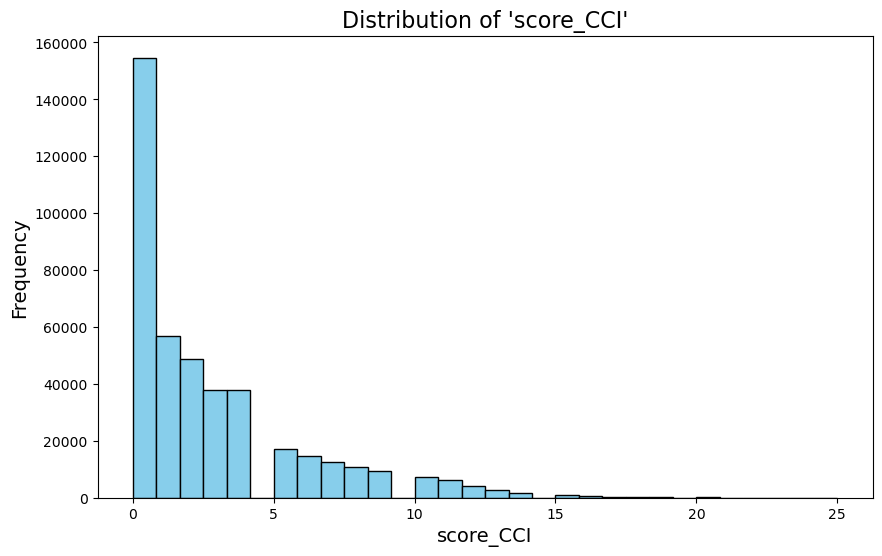

In [37]:
# Define the variable to explore
variable = 'score_CCI'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

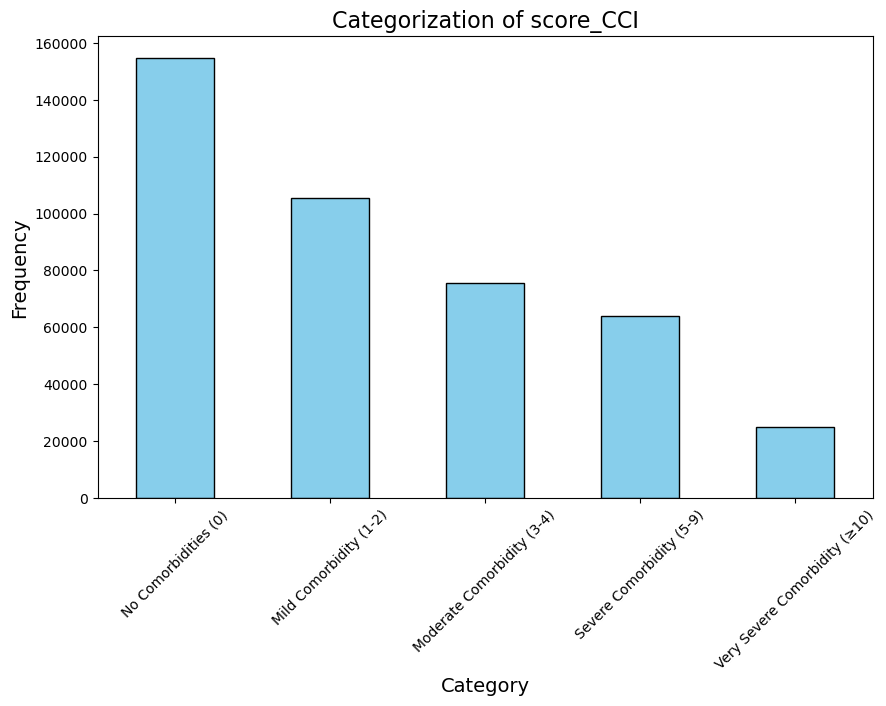

,score_CCI,score_CCI_category,score_CCI_numeric
0,1,Mild Comorbidity (1-2),1
1,6,Severe Comorbidity (5-9),3
2,6,Severe Comorbidity (5-9),3
3,6,Severe Comorbidity (5-9),3
4,6,Severe Comorbidity (5-9),3


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize score_CCI
def categorize_score_cci(value):
    if value == 0:
        return 'No Comorbidities (0)'
    elif 1 <= value <= 2:
        return 'Mild Comorbidity (1-2)'
    elif 3 <= value <= 4:
        return 'Moderate Comorbidity (3-4)'
    elif 5 <= value <= 9:
        return 'Severe Comorbidity (5-9)'
    else:
        return 'Very Severe Comorbidity (≥10)'

# Apply the categorization
df_master['score_CCI_category'] = df_master['score_CCI'].apply(categorize_score_cci)

# Define the correct category order
category_order = [
    'No Comorbidities (0)',
    'Mild Comorbidity (1-2)',
    'Moderate Comorbidity (3-4)',
    'Severe Comorbidity (5-9)',
    'Very Severe Comorbidity (≥10)'
]

# Map categories to numerical values
category_mapping = {category: i for i, category in enumerate(category_order)}

# Create a numerical encoding for classifier use
df_master['score_CCI_numeric'] = df_master['score_CCI_category'].map(category_mapping)

# Count values and sort them in the predefined order
category_counts = df_master['score_CCI_category'].value_counts().reindex(category_order)

# Visualize the categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of score_CCI', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display a sample to verify
df_master[['score_CCI', 'score_CCI_category', 'score_CCI_numeric']].head()


In [39]:
df_master

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,...,microbiology_event,time_to_med_event_hr,med_event,triage_temperature_iter,triage_heartrate_iter,triage_resprate_iter,triage_o2sat_iter,triage_sbp_iter,triage_dbp_iter,triage_pain_iter,ed_temperature_last_iter,ed_heartrate_last_iter,ed_resprate_last_iter,ed_o2sat_last_iter,ed_sbp_last_iter,ed_dbp_last_iter,ed_pain_last_iter,triage_acuity_iter,score_CCI,triage_MAP,score_REMS,score_CART,score_NEWS,score_NEWS2,score_MEWS,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_UNKNOWN,arrival_transport_WALK_IN,n_icu_365d_category,n_icu_365d_numeric,triage_sbp_iter_category,triage_sbp_iter_numeric,triage_dbp_iter_category,triage_dbp_iter_numeric,triage_resprate_iter_category,triage_resprate_iter_numeric,triage_heartrate_iter_category,triage_heartrate_iter_numeric,age_category,age_numeric,triage_acuity_iter_category,triage_acuity_iter_numeric,score_NEWS_category,score_NEWS_numeric,score_NEWS2_category,score_NEWS2_numeric,score_CCI_category,score_CCI_numeric
0,0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,0,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,Other,2180,52,False,0 days 04:13:00,NaN,NaN,False,True,False,0,0,0,2180-06-26 15:54:00,50 days 16:24:00,False,0,0,0,0,0,0,4.22,NaN,50.68,36.888889,70.0,16.0,97.0,106.0,63.0,...,1.0,2.37,1.0,37.0,70.0,16.0,97.0,106.0,63.0,0.0,36.500000,79.0,16.0,98.000000,107.0,60.0,0.000000,3.0,1,77.333333,2,0,1,1,1,True,False,False,False,False,No ICU admissions,0,Low-Normal SBP (90-119),1,Low-Normal DBP (60-79),1,Normal Respiration (16-21 bpm),2,Normal HR (60-99 bpm),2,Middle-aged (45-59),2,ESI 3 - Urgent,3.0,Low Risk (1),1,Low Risk (1),1,Mild Comorbidity (1-2),1
1,1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,0,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,Medicaid,2180,52,False,0 days 05:37:00,NaN,NaN,False,True,False,0,1,1,2180-07-22 16:24:00,25 days 18:53:00,False,0,1,1,0,0,0,5.62,NaN,25.79,37.166667,88.0,18.0,97.0,116.0,88.0,...,1.0,3.33,1.0,37.0,88.0,18.0,97.0,116.0,88.0,10.0,36.611111,86.0,17.0,93.000000,96.0,57.0,5.000000,3.0,6,97.333333,2,0,0,0,1,True,False,False,False,False,No ICU admissions,0,Low-Normal SBP (90-119),1,Normal DBP (80-89),2,Normal Respiration (16-21 bpm),2,Normal HR (60-99 bpm),2,Middle-aged (45-59),2,ESI 3 - Urgent,3.0,No Risk (0),0,No Risk (0),0,Severe Comorbidity (5-9),3
2,3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,0,WHITE,AMBULANCE,HOME,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 13:30:00,2180-07-23 14:00:00,0 days 08:06:00,True,True,True,1,2,2,2180-07-23 05:54:00,0 days 00:00:00,True,1,2,2,0,0,0,13.50,8.1,0.00,36.555556,87.0,14.0,97.0,71.0,43.0,...,1.0,11.53,1.0,37.0,87.0,14.0,97.0,71.0,43.0,7.0,36.777778,85.0,18.0,98.000000,81.0,38.0,0.000000,2.0,6,52.333333,4,4,3,3,2,True,False,False,False,False,No ICU admissions,0,Severely Low SBP (<90),0,Severely Low DBP (<60),0,Low-Normal Respiration (10-15 bpm),1,Normal HR (60-99 bpm),2,Middle-aged (45-59),2,ESI 2 - Emergent,2.0,Mild Risk (2-4),2,Mild Risk (2-4),2,Severe Comorbidity (5-9),3
3,4,10000032,29079

### triage_pain_iter

Summary Statistics for 'triage_pain_iter':
count    425087.000000
mean          4.156130
std           3.659882
min           0.000000
25%           0.000000
50%           4.000000
75%           8.000000
max          10.000000
Name: triage_pain_iter, dtype: float64

Number of Missing Values in 'triage_pain_iter': 0


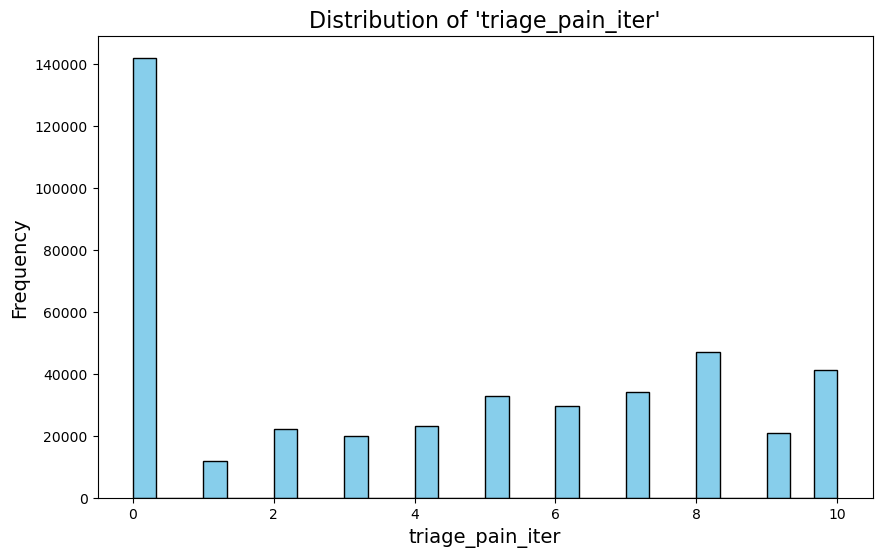

In [64]:
# Define the variable to explore
variable = 'triage_pain_iter'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

In [65]:
negative_count = (df_master['triage_pain_iter'] == 11).sum()
print("Number of 11 values in triage_pain_iter:", negative_count)

df_master.loc[df_master['triage_pain_iter'] == 11, 'triage_pain_iter'] = 10

Number of 11 values in triage_pain_iter: 0


In [66]:
negative_count = (df_master['triage_pain_iter'] == -1).sum()
print("Number of -1 values in triage_pain_iter:", negative_count)


df_master.loc[df_master['triage_pain_iter'] == -1, 'triage_pain_iter'] = 0


Number of -1 values in triage_pain_iter: 0


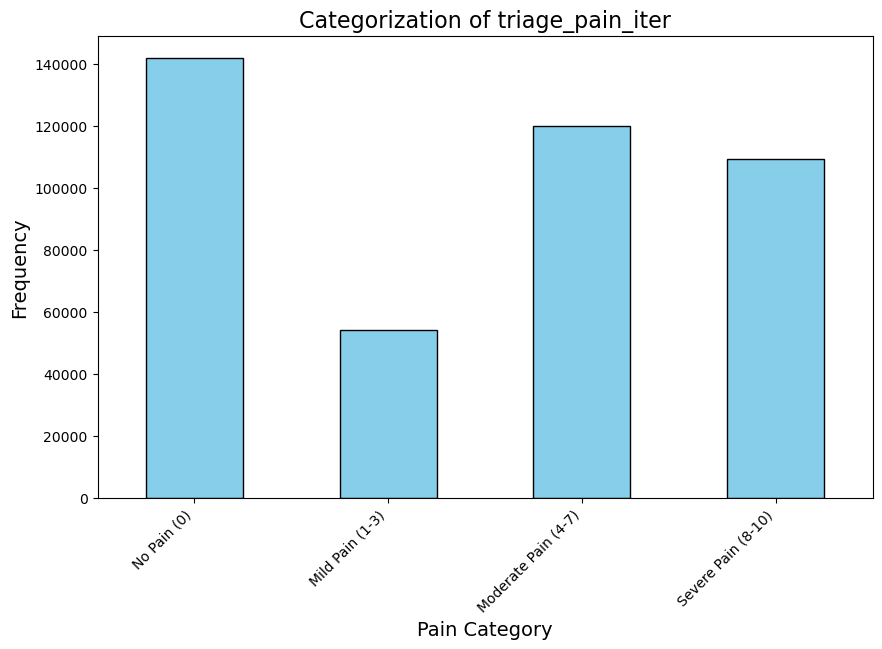

   triage_pain_iter triage_pain_iter_category  triage_pain_iter_numeric
0               0.0               No Pain (0)                         0
1              10.0        Severe Pain (8-10)                         3
2               7.0       Moderate Pain (4-7)                         2
3              -0.0               No Pain (0)                         0
4              10.0        Severe Pain (8-10)                         3
5               0.0               No Pain (0)                         0
6               0.0               No Pain (0)                         0
7               5.0       Moderate Pain (4-7)                         2
8               5.0       Moderate Pain (4-7)                         2
9               5.0       Moderate Pain (4-7)                         2


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace negative values in 'triage_pain_iter' with 0
df_master.loc[df_master['triage_pain_iter'] < 0, 'triage_pain_iter'] = 0

# Define a function to categorize 'triage_pain_iter' into meaningful bins
def categorize_pain(value):
    if value == 0:
        return 'No Pain (0)'
    elif 1 <= value <= 3:
        return 'Mild Pain (1-3)'
    elif 4 <= value <= 7:
        return 'Moderate Pain (4-7)'
    elif 8 <= value <= 10:
        return 'Severe Pain (8-10)'


# Apply the categorization to the DataFrame column 'triage_pain_iter'
df_master['triage_pain_iter_category'] = df_master['triage_pain_iter'].apply(categorize_pain)

# Define the desired category order
category_order = [
    'No Pain (0)',
    'Mild Pain (1-3)',
    'Moderate Pain (4-7)',
    'Severe Pain (8-10)',
]

# (Optional) Create a mapping to numeric codes for further machine learning usage
category_mapping = {category: i for i, category in enumerate(category_order)}
df_master['triage_pain_iter_numeric'] = df_master['triage_pain_iter_category'].map(category_mapping)

# Count the occurrences of each category in the predefined order
category_counts = df_master['triage_pain_iter_category'].value_counts().reindex(category_order)

# Visualize the categorized distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of triage_pain_iter', fontsize=16)
plt.xlabel('Pain Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

# Display a sample of the transformed data
print(df_master[['triage_pain_iter', 'triage_pain_iter_category', 'triage_pain_iter_numeric']].head(10))


### n_ed_365d

Summary Statistics for 'n_ed_365d':
count    425087.000000
mean          1.403790
std           4.207649
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         112.000000
Name: n_ed_365d, dtype: float64

Number of Missing Values in 'n_ed_365d': 0


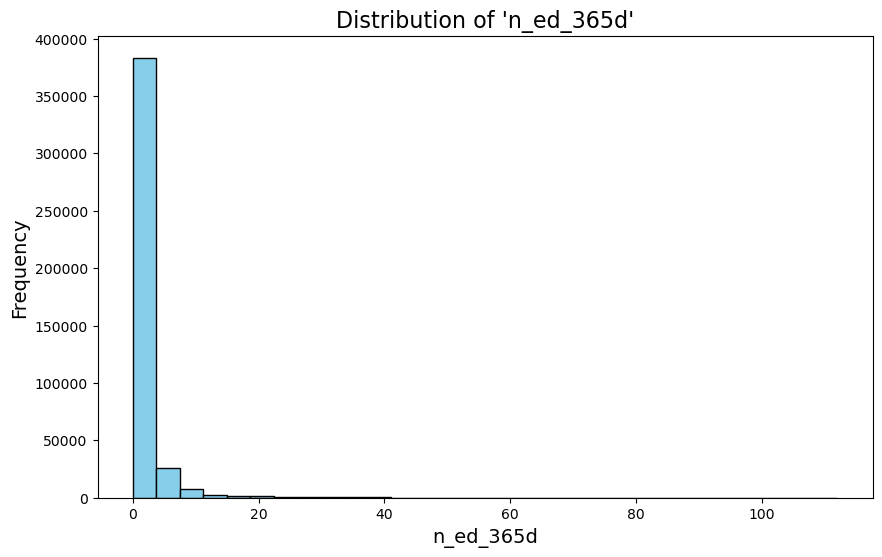

In [68]:
# Define the variable to explore
variable = 'n_ed_365d'

# Display basic statistics and missing values
print(f"Summary Statistics for '{variable}':")
print(df_master[variable].describe())
print(f"\nNumber of Missing Values in '{variable}': {df_master[variable].isnull().sum()}")

# Plot the distribution of the variable
plt.figure(figsize=(10, 6))
plt.hist(df_master[variable].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of '{variable}'", fontsize=16)
plt.xlabel(variable, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

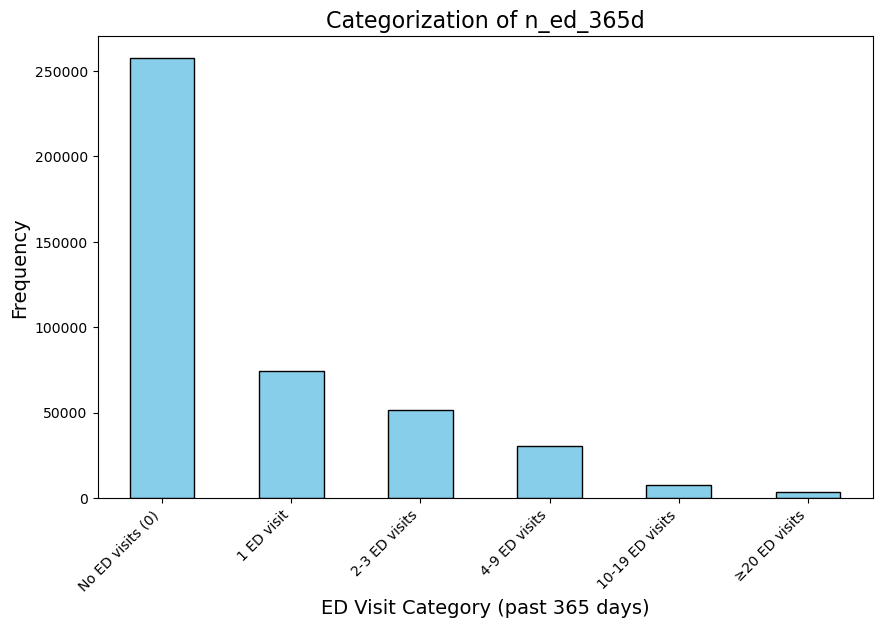

    n_ed_365d n_ed_365d_category  n_ed_365d_numeric
0           0   No ED visits (0)                  0
1           1         1 ED visit                  1
2           2      2-3 ED visits                  2
3           3      2-3 ED visits                  2
4           4      4-9 ED visits                  3
5           0   No ED visits (0)                  0
6           1         1 ED visit                  1
7           0   No ED visits (0)                  0
8           1         1 ED visit                  1
9           2      2-3 ED visits                  2
10          0   No ED visits (0)                  0
11          1         1 ED visit                  1
12          0   No ED visits (0)                  0
13          0   No ED visits (0)                  0
14          1         1 ED visit                  1


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Example function to categorize 'n_ed_365d' into bins
def categorize_n_ed_365d(value):
    if value == 0:
        return 'No ED visits (0)'
    elif value == 1:
        return '1 ED visit'
    elif 2 <= value <= 3:
        return '2-3 ED visits'
    elif 4 <= value <= 9:
        return '4-9 ED visits'
    elif 10 <= value <= 19:
        return '10-19 ED visits'
    else:  # value >= 20
        return '≥20 ED visits'

# Apply the categorization
df_master['n_ed_365d_category'] = df_master['n_ed_365d'].apply(categorize_n_ed_365d)

# Define a category order (from fewest to highest ED visits)
category_order = [
    'No ED visits (0)',
    '1 ED visit',
    '2-3 ED visits',
    '4-9 ED visits',
    '10-19 ED visits',
    '≥20 ED visits'
]

# Map each category to a numeric code if needed for ML
category_mapping = {cat: i for i, cat in enumerate(category_order)}
df_master['n_ed_365d_numeric'] = df_master['n_ed_365d_category'].map(category_mapping)

# Count values in the predefined order
category_counts = df_master['n_ed_365d_category'].value_counts().reindex(category_order)

# Plot the categorized distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Categorization of n_ed_365d', fontsize=16)
plt.xlabel('ED Visit Category (past 365 days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

# Inspect a few rows to verify the transformation
print(df_master[['n_ed_365d', 'n_ed_365d_category', 'n_ed_365d_numeric']].head(15))


In [70]:
### 

variable = [
    'triage_acuity_iter',
    'arrival_transport',
    'score_NEWS',
    'triage_sbp_iter',
    'med_event',
    'score_CART',
    'score_CCI',
    'n_icu_365d',
    'triage_heartrate_iter',
    'triage_resprate_iter',
    'age',
    'triage_dbp_iter',
    'triage_pain_iter',
    'score_NEWS2',
    'n_ed_365d'

]





variable = [
    "triage_acuity_iter", "arrival_transport_WALK_IN", "score_NEWS", 
    "triage_sbp_iter", "arrival_transport_UNKNOWN", "score_CCI",
    "arrival_transport_HELICOPTER", "med_event", "n_icu_365d", "triage_resprate_iter", 
    "score_CART", "score_NEWS2", "age", "triage_heartrate_iter", "triage_dbp_iter"
]

# 📌 Define the Target Variable
target = "outcome_critical"

In [77]:
selected_variables = [
    "triage_acuity_iter_category",'triage_acuity_iter_numeric', "arrival_transport",
    "score_NEWS_category",'score_NEWS_numeric',"triage_sbp_iter_category",'triage_sbp_iter_numeric',
    "med_event",'score_CART_category','score_CART_numeric',"score_CCI_category",'score_CCI_numeric',
    "n_icu_365d_numeric",'n_icu_365d_category', 'triage_heartrate_iter_category','triage_heartrate_iter_numeric',
    'triage_resprate_iter_category','triage_resprate_iter_numeric','age_category','age_numeric',
    'triage_dbp_iter_category','triage_dbp_iter_numeric', 'score_NEWS2_category','score_NEWS2_numeric',
    'n_ed_365d_category','n_ed_365d_numeric','triage_pain_iter_category','triage_pain_iter_numeric',
    
    "outcome_critical"
]

In [78]:
df_critical_categorical = df_master[selected_variables]

In [79]:
df_critical_categorical

,triage_acuity_iter_category,triage_acuity_iter_numeric,arrival_transport,score_NEWS_category,score_NEWS_numeric,triage_sbp_iter_category,triage_sbp_iter_numeric,med_event,score_CART_category,score_CART_numeric,score_CCI_category,score_CCI_numeric,n_icu_365d_numeric,n_icu_365d_category,triage_heartrate_iter_category,triage_heartrate_iter_numeric,triage_resprate_iter_category,triage_resprate_iter_numeric,age_category,age_numeric,triage_dbp_iter_category,triage_dbp_iter_numeric,score_NEWS2_category,score_NEWS2_numeric,n_ed_365d_category,n_ed_365d_numeric,triage_pain_iter_category,triage_pain_iter_numeric,outcome_critical
0,ESI 3 - Urgent,3.0,AMBULANCE,Low Risk (1),1,Low-Normal SBP (90-119),1,1.0,No Risk (0),0,Mild Comorbidity (1-2),1,0,No ICU admissions,Normal HR (60-99 bpm),2,Normal Respiration (16-21 bpm),2,Middle-aged (45-59),2,Low-Normal DBP (60-79),1,Low Risk (1),1,No ED visits (0),0,No Pain (0),0,False
1,ESI 3 - Urgent,3.0,AMBULANCE,No Risk (0),0,Low-Normal SBP (90-119),1,1.0,No Risk (0),0,Severe Comorbidity (5-9),3,0,No ICU admissions,Normal HR (60-99 bpm),2,Normal Respiration (16-21 bpm),2,Middle-aged (45-59),2,Normal DBP (80-89),2,No Risk (0),0,1 ED visit,1,Severe Pain (8-10),3,False
2,ESI 2 - Emergent,2.0,AMBULANCE,Mild Risk (2-4),2,Severely Low SBP (<90),0,1.0,Low Risk (1-4),1,Severe Comorbidity (5-9),3,0,No ICU admissions,Normal HR (60-99 bpm),2,Low-Normal Respiration (10-15 bpm),1,Middle-aged (45-59),2,Severely Low DBP (<60),0,Mild Risk (2-4),2,2-3 ED visits,2,Moderate Pain (4-7),2,True
3,ESI 2 - Emergent,2.0,AMBULANCE,Mild Risk (2-4),2,Low-Normal SBP (90-119),1,1.0,No Risk (0),0,Severe Comorbidity (5-9),3,0,No ICU admissions,Normal HR (60-99 bpm),2,Normal Respiration (16-21 bpm),2,Middle-aged (45-59),2,Severely Low DBP (<60),0,Mild Risk (2-4),2,2-3 ED visits,2,No Pain (0),0,True
4,ESI 3 - Urgent,3.0,AMBULANCE,Mild Risk (2-4),2,Low-Normal SBP (90-119),1,1.0,No Risk (0),0,Severe Comorbidity (5-9),3,1,1 ICU admission,Mildly High HR (100-119 bpm),3,Normal Respiration (16-21 bpm),2,Middle-aged (45-59),2,Severely Low DBP (<60),0,Mild Risk (2-4),2,4-9 ED visits,3,Severe Pain (8-10),3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425082,ESI 3 - Urgent,3.0,WALK IN,Low Risk (1),1,Normal SBP (120-139),2,1.0,Low Risk (1-4),1,Moderate Comorbidity (3-4),2,0,No ICU admissions,Normal HR (60-99 bpm),2,Normal Respiration (16-21 bpm),2,Middle-aged (45-59),2,Low-Normal DBP (60-79),1,Low Risk (1),1,2-3 ED visits,2,No Pain (0),0,False
425083,ESI 2 - Emergent,2.0,WALK IN,Low Risk (1),1,Low-Normal SBP (90-119),1,1.0,No Risk (0),0,No Comorbidities (0),0,0,No ICU admissions,Normal HR (60-99 bpm),2,Normal Respiration (16-21 bpm),2,Middle-aged (45-59),2,Low-Normal DBP (60-79),1,Low Risk (1),1,No ED visits (0),0,Severe Pain (8-10),3,False
425084,ESI 2 - Emergent,2.0,AMBULANCE,Mild Risk (2-4),2,Low-Normal SBP (90-119),1,1.0,Low Risk (1-4),1,Mild Comorbidity (1-2),1,0,No ICU admissions,Mildly High HR (100-119 bpm),3,Normal Respiration (16-21 bpm),2,Middle-aged (45-59),2,Normal DBP (80-89),2,Mild Risk (2-4),2,No ED visits (0),0,Moderate Pain (4-7),2,True
425085,ESI 2 - Emergent,2.0,UNKNOWN,Mild Risk (2-4),2,Low-Normal SBP (90-119),1,0.0,No Risk (0),0,No Comorbidities (0),0,0,No ICU admissions,Normal HR (60-99 bpm),2,Low-Normal Respiration (10-15 bpm),1,Middle-aged (45-59),2,Severely Low DBP (<60),0,Mild Risk (2-4),2,No ED visits (0),0,No Pain (0),0,False


In [80]:
# Save the DataFrame
df_critical_categorical.to_csv('df_critical_categorical_variables_15_3_Latest.csv', index=False)

In [62]:
df_master = pd.read_csv('df_critical_categorical_variables.csv')

In [ ]:
import matplotlib.pyplot as plt


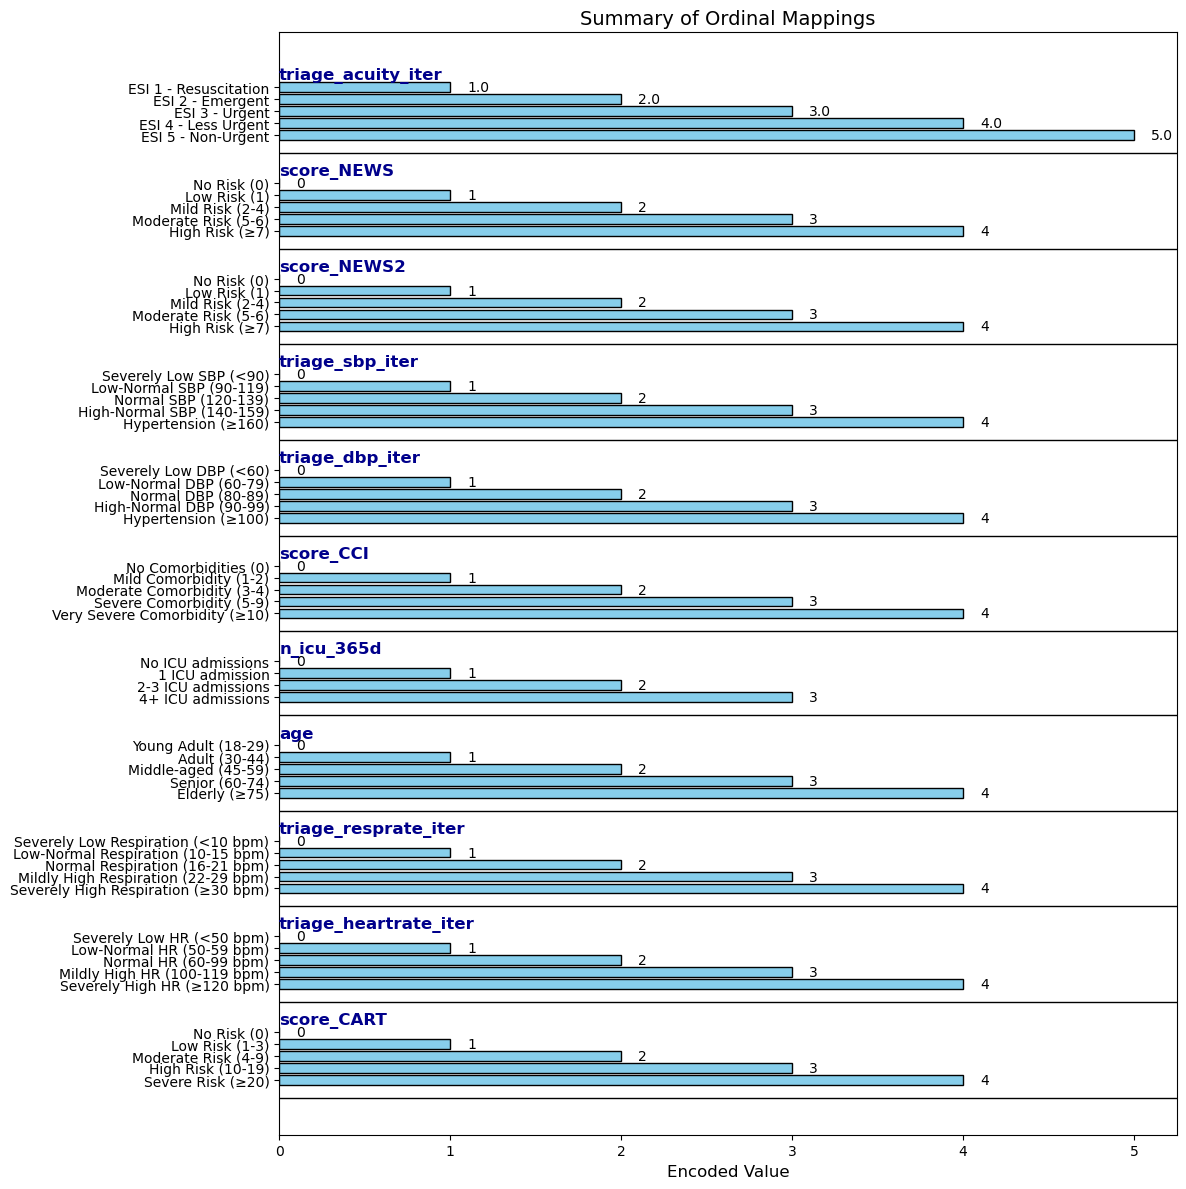

In [50]:

updated_ordinal_mappings = {
    "triage_acuity_iter": {
        "ESI 3 - Urgent": 3.0,
        "ESI 2 - Emergent": 2.0,
        "ESI 4 - Less Urgent": 4.0,
        "ESI 1 - Resuscitation": 1.0,
        "ESI 5 - Non-Urgent": 5.0
    },
    "score_NEWS": {
        "Low Risk (1)": 1,
        "No Risk (0)": 0,
        "Mild Risk (2-4)": 2,
        "Moderate Risk (5-6)": 3,
        "High Risk (≥7)": 4
    },
    "score_NEWS2": {
        "Low Risk (1)": 1,
        "No Risk (0)": 0,
        "Mild Risk (2-4)": 2,
        "Moderate Risk (5-6)": 3,
        "High Risk (≥7)": 4
    },
    "triage_sbp_iter": {
        "Low-Normal SBP (90-119)": 1,
        "Severely Low SBP (<90)": 0,
        "Normal SBP (120-139)": 2,
        "High-Normal SBP (140-159)": 3,
        "Hypertension (≥160)": 4
    },
    "triage_dbp_iter": {
        "Low-Normal DBP (60-79)": 1,
        "Normal DBP (80-89)": 2,
        "Severely Low DBP (<60)": 0,
        "High-Normal DBP (90-99)": 3,
        "Hypertension (≥100)": 4
    },
    "score_CCI": {
        "Mild Comorbidity (1-2)": 1,
        "Moderate Comorbidity (3-4)": 2,
        "Severe Comorbidity (5-9)": 3,
        "No Comorbidities (0)": 0,
        "Very Severe Comorbidity (≥10)": 4
    },
    "n_icu_365d": {
        "No ICU admissions": 0,
        "1 ICU admission": 1,
        "2-3 ICU admissions": 2,
        "4+ ICU admissions": 3
    },
    "age": {
        "Young Adult (18-29)": 0,
        "Adult (30-44)": 1,
        "Middle-aged (45-59)": 2,
        "Senior (60-74)": 3,
        "Elderly (≥75)": 4
    },
    "triage_resprate_iter": {
        "Severely Low Respiration (<10 bpm)": 0,
        "Low-Normal Respiration (10-15 bpm)": 1,
        "Normal Respiration (16-21 bpm)": 2,
        "Mildly High Respiration (22-29 bpm)": 3,
        "Severely High Respiration (≥30 bpm)": 4
    },
    "triage_heartrate_iter": {
        "Severely Low HR (<50 bpm)": 0,
        "Low-Normal HR (50-59 bpm)": 1,
        "Normal HR (60-99 bpm)": 2,
        "Mildly High HR (100-119 bpm)": 3,
        "Severely High HR (≥120 bpm)": 4
    },
    "score_CART": {
        "No Risk (0)": 0,
        "Low Risk (1-4)": 1,
        "Moderate Risk (5-9)": 2,
        "High Risk (10-19)": 3,
        "Severe Risk (≥20)": 4
    }
}

import matplotlib.pyplot as plt

def save_improved_ordinal_mappings_plot(ordinal_mappings, filename="improved_ordinal_mappings.png"):
    fig, ax = plt.subplots(figsize=(12, 12))

    categories = []
    values = []
    y_positions = []
    group_starts = []
    group_labels = []

    # Assign positions for categories with spacing
    y_offset = 0
    # Loop over each variable group (the keys in ordinal_mappings)
    for variable, mapping in ordinal_mappings.items():
        # Sort the mapping items by their numeric value in ascending order (0,1,2,3,4,...)
        sorted_pairs = sorted(mapping.items(), key=lambda x: x[1])
        labels = [p[0] for p in sorted_pairs]
        vals = [p[1] for p in sorted_pairs]

        categories.extend(labels)
        values.extend(vals)
        y_positions.extend(range(y_offset, y_offset + len(labels)))

        group_starts.append(y_offset + len(labels) - 0.5)  # Mark end of each group
        group_labels.append((y_offset - 1, variable))  # Position the variable name above the group

        y_offset += len(labels) + 3  # Increase spacing between groups

    bars = ax.barh(y_positions, values, color="skyblue", edgecolor="black")

    ax.set_yticks(y_positions)
    ax.set_yticklabels(categories, fontsize=10)
    ax.set_xlabel("Encoded Value", fontsize=12)
    ax.set_title("Summary of Ordinal Mappings", fontsize=14)
    ax.invert_yaxis()  # Show highest values on top

    # Increase left margin to ensure group names are visible
    plt.subplots_adjust(left=0.35)

    # Add demarcation lines and place variable names for each group
    for pos in group_starts:
        ax.axhline(y=pos + 1, color='black', linewidth=1)

    for pos, label in group_labels:
        ax.text(0, pos, label, fontsize=12, fontweight="bold", ha="left", va="center", color="darkblue")

    # Add numerical values at the end of each bar
    for bar, value in zip(bars, values):
        ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, str(value),
                fontsize=10, va="center", ha="left", color="black")

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Use your mapping dictionary (updated_ordinal_mappings) to generate the plot
save_improved_ordinal_mappings_plot(updated_ordinal_mappings)

